<a href="https://colab.research.google.com/github/conchsunmarkcashew/cashew/blob/main/ipl_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cufflinks as cf
cf.go_offline()
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
balls = pd.read_csv('/content/IPL_Ball_by_Ball_2008_2022.csv')
balls.shape

(58722, 17)

In [ ]:
matches = pd.read_csv('/content/IPL_Matches_2008_2022.csv')
matches.shape

(950, 20)

In [ ]:
balls.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals


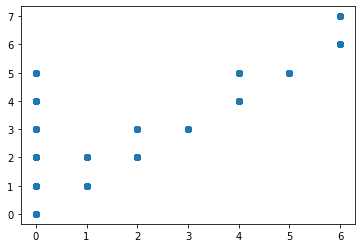

In [ ]:
x=balls['batsman_run']
y=balls['total_run']
plt.scatter(x,y)

In [ ]:
balls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58722 entries, 0 to 58721
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 58722 non-null  int64  
 1   innings            58722 non-null  int64  
 2   overs              58722 non-null  int64  
 3   ballnumber         58722 non-null  int64  
 4   batter             58722 non-null  object 
 5   bowler             58721 non-null  object 
 6   non-striker        58721 non-null  object 
 7   extra_type         3044 non-null   object 
 8   batsman_run        58721 non-null  float64
 9   extras_run         58721 non-null  float64
 10  total_run          58721 non-null  float64
 11  non_boundary       58721 non-null  float64
 12  isWicketDelivery   58721 non-null  float64
 13  player_out         2876 non-null   object 
 14  kind               2876 non-null   object 
 15  fielders_involved  2067 non-null   object 
 16  BattingTeam        587

In [ ]:
balls.describe()

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery
count,5.872200e+04,58722.000000,58722.000000,58722.000000,58721.000000,58721.000000,58721.000000,58721.000000,58721.000000
mean,1.245231e+06,1.486938,9.269746,3.628334,1.270295,0.064560,1.334855,0.000119,0.048977
std,4.677868e+04,0.506602,5.695251,1.818586,1.651407,0.333533,1.639135,0.010918,0.215823
min,1.175366e+06,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.216503e+06,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.254070e+06,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.304060e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.312200e+06,6.000000,19.000000,10.000000,6.000000,5.000000,7.000000,1.000000,1.000000


In [ ]:
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [ ]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

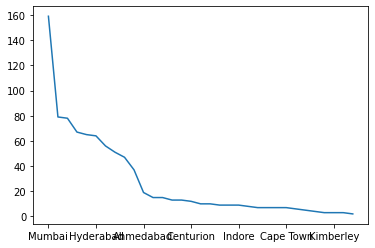

In [ ]:
matches['City'].value_counts().plot()

In [ ]:
total_score = balls.groupby(['ID', 'innings']).sum()['total_run'].reset_index()

In [ ]:
total_score.head()

,ID,innings,total_run
0,1254095,1,141.0
1,1254095,2,13.0
2,1254096,1,155.0
3,1254096,2,159.0
4,1254097,1,154.0


In [ ]:
total_score = total_score[total_score['innings']==1]

In [ ]:
total_score.head()

,ID,innings,total_run
0,1254095,1,141.0
2,1254096,1,155.0
4,1254097,1,154.0
6,1254098,1,171.0
8,1254099,1,135.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Total matches played in each season')

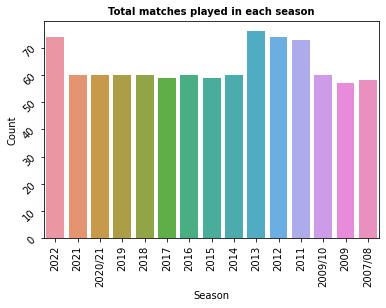

In [ ]:
sns.countplot(matches['Season'])
plt.xticks(rotation=90, fontsize=10)
plt.yticks(rotation=45,fontsize=10)
plt.xlabel('Season', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Total matches played in each season', fontsize = 10, fontweight = "bold")

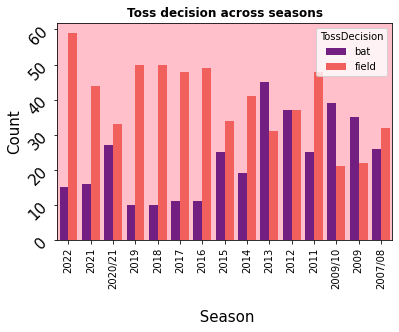

In [ ]:
ax = plt.axes()
ax.set(facecolor = "pink")
sns.countplot(x='Season', hue='TossDecision', data=matches,palette="magma",saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(rotation=45,fontsize=15)
plt.xlabel('\n Season',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Toss decision across seasons',fontsize=12,fontweight="bold")
plt.show()

In [ ]:
matches['WonBy'].value_counts()

Wickets      509
Runs         423
SuperOver     14
NoResults      4
Name: WonBy, dtype: int64

In [ ]:
match_per_season = matches.groupby(['Season'])['ID'].count().reset_index().rename(columns={'ID':'matches'})
match_per_season

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


In [ ]:
season_data=matches[['ID','Season']].merge(balls, left_on = 'ID', right_on = 'ID', how = 'left').drop('ID', axis = 1)
season_data.head()

,Season,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,2022,1.0,0.0,1.0,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
1,2022,1.0,0.0,2.0,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
2,2022,1.0,0.0,3.0,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
3,2022,1.0,0.0,4.0,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
4,2022,1.0,0.0,5.0,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals


In [ ]:
matches.Venue[matches.WonBy!='runs'].mode()

0    Eden Gardens
dtype: object

In [ ]:
matches.Venue[matches.WonBy!='wickets'].mode()

0    Eden Gardens
dtype: object

In [ ]:
matches.WinningTeam[matches.WonBy!='wickets'].mode()

0    Mumbai Indians
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



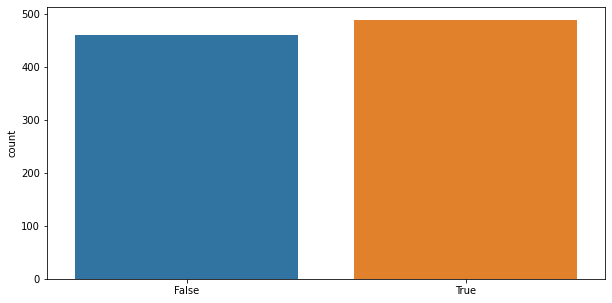

In [ ]:
toss = matches['TossWinner'] == matches['WinningTeam']
plt.figure(figsize=(10,5))
sns.countplot(toss)
plt.show()

In [ ]:
player = (balls['batter']=='SK Raina')
df_raina=balls[player]
df_raina.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
19117,1254113,2,14,2,SK Raina,YS Chahal,AT Rayudu,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings
19118,1254113,2,14,3,SK Raina,YS Chahal,AT Rayudu,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings
19120,1254113,2,14,5,SK Raina,YS Chahal,AT Rayudu,NaN,4.0,0.0,4.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings
19121,1254113,2,14,6,SK Raina,YS Chahal,AT Rayudu,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings
19130,1254113,2,16,3,SK Raina,PWH de Silva,MS Dhoni,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Chennai Super Kings


In [ ]:
def count(df_raina,runs):
    return len(df_raina[df_raina['batsman_run']==runs])*runs

In [ ]:
print("Runs scored from 1's :",count(df_raina,1))
print("Runs scored from 2's :",count(df_raina,2))
print("Runs scored from 3's :",count(df_raina,3))
print("Runs scored from 4's :",count(df_raina,4))
print("Runs scored from 6's :",count(df_raina,6))

Runs scored from 1's : 6
Runs scored from 2's : 4
Runs scored from 3's : 0
Runs scored from 4's : 16
Runs scored from 6's : 6


In [ ]:
runs = balls.groupby(['batter'])['batsman_run'].sum().reset_index()
runs.columns = ['Batsman' , 'runs']
y = runs.sort_values(by='runs',ascending = False).head(10).reset_index().drop('index',axis=1)
print(y)

        Batsman   runs
0    JC Buttler  863.0
1      KL Rahul  774.0
2  Shubman Gill  751.0
3     Q de Kock  650.0
4    RD Gaikwad  649.0
5      S Dhawan  643.0
6  F du Plessis  639.0
7     SV Samson  634.0
8   RA Tripathi  614.0
9       SS Iyer  575.0


Text(0.5, 1.0, 'Top 10 run scorers in IPL')

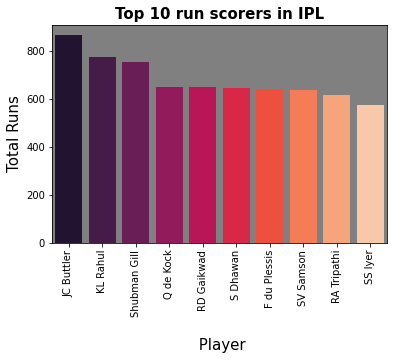

In [ ]:
ax = plt.axes()
ax.set(facecolor = "grey")
sns.barplot(x=y['Batsman'],y=y['runs'],palette='rocket',saturation=1)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('\n Player',fontsize=15)
plt.ylabel('Total Runs',fontsize=15)
plt.title('Top 10 run scorers in IPL',fontsize=15,fontweight="bold")

Text(0.5, 1.0, 'Highest MOM award winners')

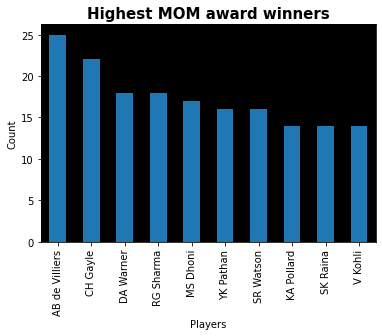

In [ ]:
ax = plt.axes()
ax.set(facecolor = "black")
matches.Player_of_Match.value_counts()[:10].plot(kind='bar')
plt.xlabel('Players')
plt.ylabel("Count")
plt.title("Highest MOM award winners",fontsize=15,fontweight="bold")

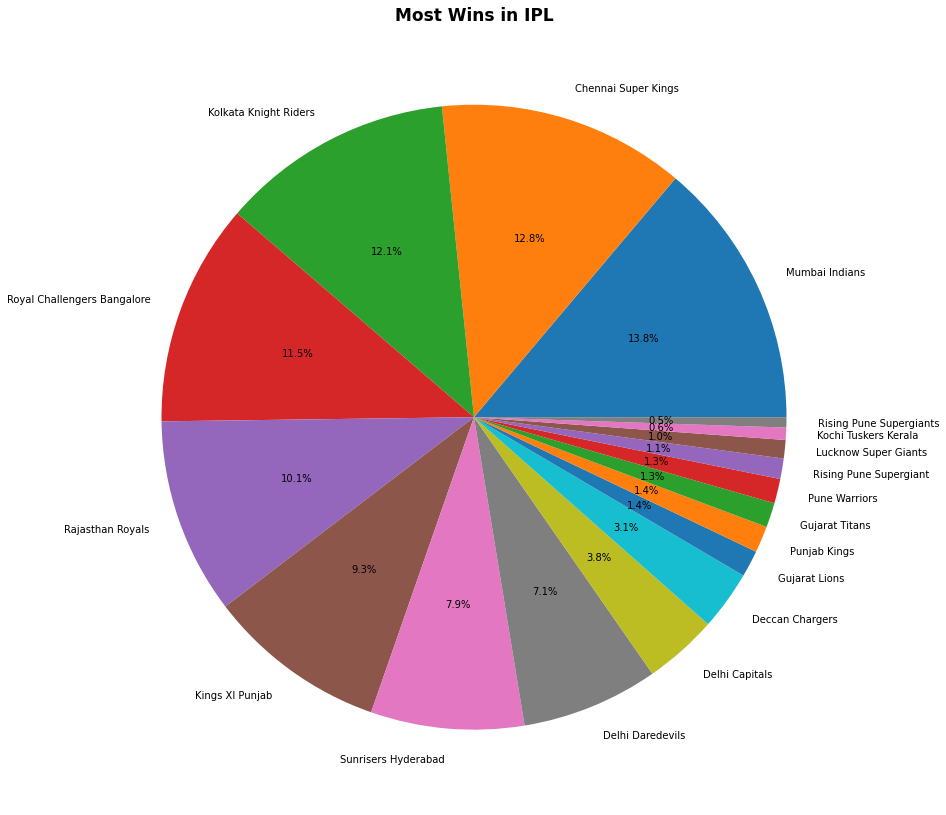

In [ ]:
temp = pd.DataFrame({"WinningTeam":matches["WinningTeam"]})
count_wins = temp.value_counts()
labels = [X[0] for X in count_wins.keys()]
bar , ax = plt.subplots(figsize =(14,15))
ax = plt.pie(x = count_wins, autopct = "%.1f%%" ,labels = labels)
plt.title("Most Wins in IPL",fontsize = 17,fontweight="bold")
plt.show()

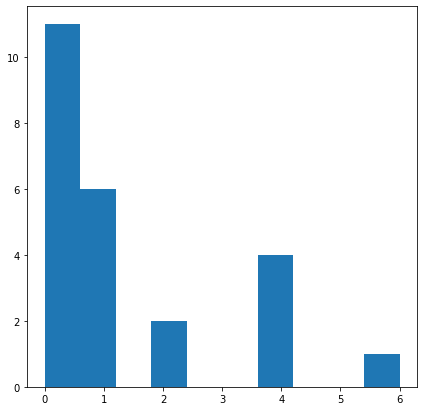

In [ ]:
plt.figure(figsize=(7,7))
plt.hist(df_raina['batsman_run'])
plt.show()

total_score['target'] = total_score['total_run'] + 1

In [ ]:
total_score['target'] = total_score['total_run'] + 1

In [ ]:
match_df = matches.merge(total_score[['ID','target']], on='ID')

In [ ]:
match_df.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,target
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,131.0
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,158.0
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,208.0
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,189.0
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,158.0


In [ ]:
match_df['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians'], dtype=object)

In [ ]:
teams = [
    'Rajasthan Royals',
    'Royal Challengers Bangalore',
    'Sunrisers Hyderabad', 
    'Delhi Capitals', 
    'Chennai Super Kings',
    'Gujarat Titans', 
    'Lucknow Super Giants', 
    'Kolkata Knight Riders',
    'Punjab Kings', 
    'Mumbai Indians'
]

In [ ]:
match_df['Team1'] = match_df['Team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['Team2'] = match_df['Team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['WinningTeam'] = match_df['WinningTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match_df['Team1'] = match_df['Team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df['Team2'] = match_df['Team2'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df['WinningTeam'] = match_df['WinningTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')


match_df['Team1'] = match_df['Team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['Team2'] = match_df['Team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['WinningTeam'] = match_df['WinningTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

In [ ]:
match_df = match_df[match_df['Team1'].isin(teams)]
match_df = match_df[match_df['Team2'].isin(teams)]
match_df = match_df[match_df['WinningTeam'].isin(teams)]

In [ ]:
match_df.shape

(97, 21)

In [ ]:
match_df.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'target'],
      dtype='object')

In [ ]:
match_df['method'].unique()

array([nan], dtype=object)

In [ ]:
match_df['method'].value_counts()

Series([], Name: method, dtype: int64)

In [ ]:
match_df = match_df[match_df['method'].isna()]

In [ ]:
match_df.shape

(97, 21)

In [ ]:
match_df.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2', 'target'],
      dtype='object')

In [ ]:
match_df = match_df[['ID','City','Team1','Team2','WinningTeam','target']].dropna()

In [ ]:
match_df.head()

,ID,City,Team1,Team2,WinningTeam,target
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0
1,1312199,Ahmedabad,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,158.0
2,1312198,Kolkata,Royal Challengers Bangalore,Lucknow Super Giants,Royal Challengers Bangalore,208.0
3,1312197,Kolkata,Rajasthan Royals,Gujarat Titans,Gujarat Titans,189.0
4,1304116,Mumbai,Sunrisers Hyderabad,Punjab Kings,Punjab Kings,158.0


In [ ]:
match_df.isna().sum()

ID             0
City           0
Team1          0
Team2          0
WinningTeam    0
target         0
dtype: int64

In [ ]:
balls.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [ ]:
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Kings XI Punjab', 'Punjab Kings')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Delhi Daredevils', 'Delhi Capitals')
balls['BattingTeam'] = balls['BattingTeam'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

balls = balls[balls['BattingTeam'].isin(teams)]

In [ ]:
balls_df = match_df.merge(balls, on='ID')

In [ ]:
balls_df.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,1,0,1,YBK Jaiswal,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,1,0,2,YBK Jaiswal,...,legbyes,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,1,0,3,JC Buttler,...,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,1,0,4,YBK Jaiswal,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,1,0,5,YBK Jaiswal,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Rajasthan Royals


In [ ]:
balls_df['BattingTeam'].value_counts()


Rajasthan Royals               2700
Kolkata Knight Riders          2598
Royal Challengers Bangalore    2583
Delhi Capitals                 2506
Chennai Super Kings            2451
Mumbai Indians                 2299
Sunrisers Hyderabad            2236
Punjab Kings                   2207
Gujarat Titans                 1971
Lucknow Super Giants           1840
Name: BattingTeam, dtype: int64

In [ ]:
balls_df.columns

Index(['ID', 'City', 'Team1', 'Team2', 'WinningTeam', 'target', 'innings',
       'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type',
       'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam'],
      dtype='object')

In [ ]:
balls_df = balls_df[balls_df['innings']==2]

In [ ]:
balls_df.shape

(11301, 22)

In [ ]:
balls_df.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,1,WP Saha,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Gujarat Titans
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,2,WP Saha,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Gujarat Titans
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,3,WP Saha,...,NaN,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Gujarat Titans
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,4,Shubman Gill,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Gujarat Titans
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,5,Shubman Gill,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Gujarat Titans


In [ ]:
balls_df.columns

Index(['ID', 'City', 'Team1', 'Team2', 'WinningTeam', 'target', 'innings',
       'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type',
       'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam'],
      dtype='object')

In [ ]:
balls_df['current_score'] = balls_df.groupby('ID')['total_run'].cumsum()

In [ ]:
balls_df

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,1,WP Saha,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Gujarat Titans,0.0
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,2,WP Saha,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Gujarat Titans,0.0
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,3,WP Saha,...,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Gujarat Titans,1.0
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,4,Shubman Gill,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Gujarat Titans,1.0
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,5,Shubman Gill,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Gujarat Titans,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23386,1254104,Dubai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,157.0,2,19,2,AF Milne,...,0.0,0.0,0.0,0.0,1.0,AF Milne,caught,K Gowtham,Mumbai Indians,134.0
23387,1254104,Dubai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,157.0,2,19,3,SS Tiwary,...,1.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Mumbai Indians,135.0
23388,1254104,Dubai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,157.0,2,19,4,RD Chahar,...,0.0,0.0,0.0,0.0,1.0,RD Chahar,caught,SK Raina,Mumbai Indians,135.0
23389,1254104,Dubai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,157.0,2,19,5,JJ Bumrah,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Mumbai Indians,135.0


In [ ]:
balls_df['runs_left'] = np.where(balls_df['target']-balls_df['current_score']>=0, balls_df['target']-balls_df['current_score'], 0)

In [ ]:
balls_df

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,current_score,runs_left
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,1,WP Saha,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Gujarat Titans,0.0,131.0
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,2,WP Saha,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Gujarat Titans,0.0,131.0
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,3,WP Saha,...,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Gujarat Titans,1.0,130.0
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,4,Shubman Gill,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Gujarat Titans,1.0,130.0
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,5,Shubman Gill,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Gujarat Titans,1.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23386,1254104,Dubai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,157.0,2,19,2,AF Milne,...,0.0,0.0,0.0,1.0,AF Milne,caught,K Gowtham,Mumbai Indians,134.0,23.0
23387,1254104,Dubai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,157.0,2,19,3,SS Tiwary,...,0.0,1.0,0.0,0.0,NaN,NaN,NaN,Mumbai Indians,135.0,22.0
23388,1254104,Dubai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,157.0,2,19,4,RD Chahar,...,0.0,0.0,0.0,1.0,RD Chahar,caught,SK Raina,Mumbai Indians,135.0,22.0
23389,1254104,Dubai,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,157.0,2,19,5,JJ Bumrah,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,Mumbai Indians,135.0,22.0


In [ ]:
balls_df['balls_left'] = np.where(120 - balls_df['overs']*6 - balls_df['ballnumber']>=0,120 - balls_df['overs']*6 - balls_df['ballnumber'], 0)

In [ ]:
balls_df['wickets_left'] = 10 - balls_df.groupby('ID')['isWicketDelivery'].cumsum()

In [ ]:
balls_df.columns

Index(['ID', 'City', 'Team1', 'Team2', 'WinningTeam', 'target', 'innings',
       'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type',
       'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam', 'current_score', 'runs_left', 'balls_left',
       'wickets_left'],
      dtype='object')

In [ ]:
balls_df['current_run_rate'] = (balls_df['current_score']*6)/(120-balls_df['balls_left'])

In [ ]:
balls_df['required_run_rate'] = np.where(balls_df['balls_left']>0, balls_df['runs_left']*6/balls_df['balls_left'], 0)

In [ ]:
balls_df.columns

Index(['ID', 'City', 'Team1', 'Team2', 'WinningTeam', 'target', 'innings',
       'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type',
       'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam', 'current_score', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate'],
      dtype='object')

In [ ]:
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

In [ ]:
balls_df['result'] = balls_df.apply(result, axis=1)

In [ ]:
balls_df.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,kind,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,1,WP Saha,...,NaN,NaN,Gujarat Titans,0.0,131.0,119,10.0,0.0,6.605042,1
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,2,WP Saha,...,NaN,NaN,Gujarat Titans,0.0,131.0,118,10.0,0.0,6.661017,1
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,3,WP Saha,...,NaN,NaN,Gujarat Titans,1.0,130.0,117,10.0,2.0,6.666667,1
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,4,Shubman Gill,...,NaN,NaN,Gujarat Titans,1.0,130.0,116,10.0,1.5,6.724138,1
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,5,Shubman Gill,...,NaN,NaN,Gujarat Titans,1.0,130.0,115,10.0,1.2,6.782609,1


In [ ]:
balls_df.columns

Index(['ID', 'City', 'Team1', 'Team2', 'WinningTeam', 'target', 'innings',
       'overs', 'ballnumber', 'batter', 'bowler', 'non-striker', 'extra_type',
       'batsman_run', 'extras_run', 'total_run', 'non_boundary',
       'isWicketDelivery', 'player_out', 'kind', 'fielders_involved',
       'BattingTeam', 'current_score', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'result'],
      dtype='object')

In [ ]:
index1 = balls_df[balls_df['Team2']==balls_df['BattingTeam']]['Team1'].index
index2 = balls_df[balls_df['Team1']==balls_df['BattingTeam']]['Team2'].index

In [ ]:
balls_df.loc[index1, 'BowlingTeam'] = balls_df.loc[index1, 'Team1']
balls_df.loc[index2, 'BowlingTeam'] = balls_df.loc[index2, 'Team2']

In [ ]:
balls_df.head()

,ID,City,Team1,Team2,WinningTeam,target,innings,overs,ballnumber,batter,...,fielders_involved,BattingTeam,current_score,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,result,BowlingTeam
120,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,1,WP Saha,...,NaN,Gujarat Titans,0.0,131.0,119,10.0,0.0,6.605042,1,Rajasthan Royals
121,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,2,WP Saha,...,NaN,Gujarat Titans,0.0,131.0,118,10.0,0.0,6.661017,1,Rajasthan Royals
122,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,3,WP Saha,...,NaN,Gujarat Titans,1.0,130.0,117,10.0,2.0,6.666667,1,Rajasthan Royals
123,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,4,Shubman Gill,...,NaN,Gujarat Titans,1.0,130.0,116,10.0,1.5,6.724138,1,Rajasthan Royals
124,1312200,Ahmedabad,Rajasthan Royals,Gujarat Titans,Gujarat Titans,131.0,2,0,5,Shubman Gill,...,NaN,Gujarat Titans,1.0,130.0,115,10.0,1.2,6.782609,1,Rajasthan Royals


In [ ]:
final_df = balls_df[['BattingTeam', 'BowlingTeam','City','runs_left','balls_left','wickets_left','current_run_rate','required_run_rate','target','result']]

In [ ]:
final_df.head()

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
120,Gujarat Titans,Rajasthan Royals,Ahmedabad,131.0,119,10.0,0.0,6.605042,131.0,1
121,Gujarat Titans,Rajasthan Royals,Ahmedabad,131.0,118,10.0,0.0,6.661017,131.0,1
122,Gujarat Titans,Rajasthan Royals,Ahmedabad,130.0,117,10.0,2.0,6.666667,131.0,1
123,Gujarat Titans,Rajasthan Royals,Ahmedabad,130.0,116,10.0,1.5,6.724138,131.0,1
124,Gujarat Titans,Rajasthan Royals,Ahmedabad,130.0,115,10.0,1.2,6.782609,131.0,1


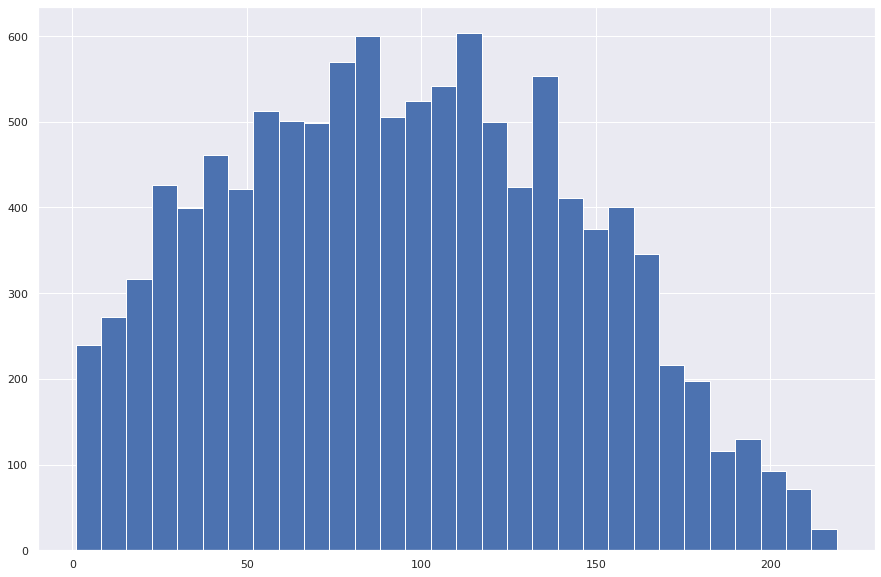

In [ ]:
fig = plt.hist(final_df[final_df['runs_left']>0]['runs_left'], bins=30,)


(array([2., 2., 1., 1., 0., 1., 0., 2., 1., 1.]),
 array([  11. ,  243.9,  476.8,  709.7,  942.6, 1175.5, 1408.4, 1641.3,
        1874.2, 2107.1, 2340. ]),
 <a list of 10 Patch objects>)

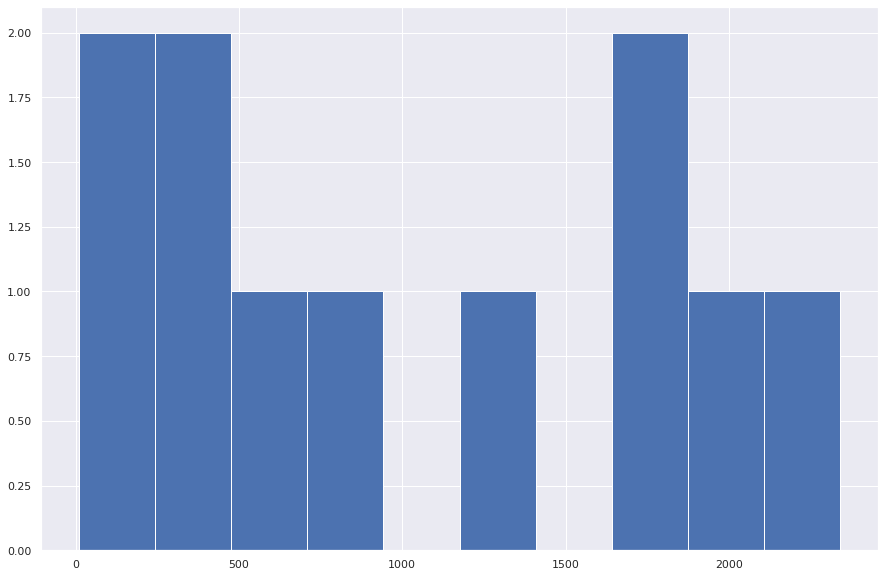

In [ ]:
plt.hist(final_df['wickets_left'].value_counts())

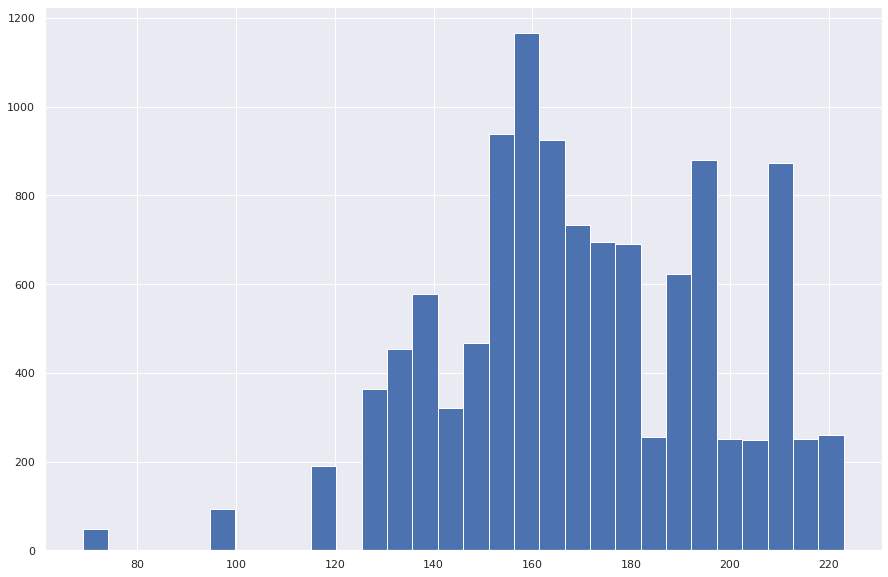

In [ ]:
fig = plt.hist(final_df['target'], bins=30)


In [ ]:
final_df.describe()

,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
count,11301.000000,11301.000000,11301.000000,11301.000000,11301.000000,11301.000000,11301.000000
mean,94.753827,61.941333,7.419343,7.448840,10.822890,169.715158,0.524821
std,50.017517,33.617963,2.206622,2.228041,11.393231,26.927563,0.499406
min,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000
25%,55.000000,34.000000,6.000000,6.321429,7.657143,153.000000,0.000000
50%,94.000000,62.000000,8.000000,7.575758,9.272727,169.000000,1.000000
75%,133.000000,91.000000,9.000000,8.792079,11.142857,190.000000,1.000000
max,219.000000,119.000000,10.000000,24.000000,414.000000,223.000000,1.000000


In [ ]:
final_df.isna().sum()


BattingTeam          0
BowlingTeam          0
City                 0
runs_left            0
balls_left           0
wickets_left         0
current_run_rate     0
required_run_rate    0
target               0
result               0
dtype: int64

In [ ]:
final_df.shape

(11301, 10)

In [ ]:
final_df.sample(final_df.shape[0])

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
19895,Kolkata Knight Riders,Sunrisers Hyderabad,Dubai,109.0,112,10.0,5.250000,5.839286,116.0,1
9385,Sunrisers Hyderabad,Royal Challengers Bangalore,Mumbai,3.0,73,9.0,8.425532,0.246575,69.0,1
4051,Delhi Capitals,Rajasthan Royals,Navi Mumbai,105.0,72,9.0,7.000000,8.750000,161.0,1
20919,Mumbai Indians,Punjab Kings,Abu Dhabi,66.0,52,7.0,6.176471,7.615385,136.0,1
18823,Chennai Super Kings,Delhi Capitals,Dubai,114.0,83,9.0,9.567568,8.240964,173.0,1
...,...,...,...,...,...,...,...,...,...,...
12278,Rajasthan Royals,Gujarat Titans,Mumbai,66.0,32,4.0,8.659091,12.375000,193.0,0
21906,Rajasthan Royals,Delhi Capitals,Abu Dhabi,90.0,40,5.0,4.875000,13.500000,155.0,0
19687,Delhi Capitals,Chennai Super Kings,Dubai,81.0,77,8.0,7.813953,6.311688,137.0,1
8646,Royal Challengers Bangalore,Rajasthan Royals,Pune,101.0,72,7.0,5.500000,8.416667,145.0,0


In [ ]:
final_df.sample()

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target,result
17852,Kolkata Knight Riders,Chennai Super Kings,Mumbai,64.0,68,9.0,7.846154,5.647059,132.0,1


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse=False,drop='first'),['BattingTeam','BowlingTeam','City'])
],
remainder = 'passthrough')

In [ ]:
from sklearn.model_selection import train_test_split

X = final_df.drop('result', axis=1)
y = final_df['result']
X.shape, y.shape

((11301, 9), (11301,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression())
])

In [ ]:
pipe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BattingTeam', 'BowlingTeam',
                                                   'City'])])),
                ('step2', LogisticRegression())])

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9035087719298246

In [ ]:
pipe.predict_proba(X_test)

array([[7.13852199e-01, 2.86147801e-01],
       [9.88381206e-01, 1.16187939e-02],
       [9.38681258e-01, 6.13187416e-02],
       [5.91150947e-02, 9.40884905e-01],
       [6.87265139e-03, 9.93127349e-01],
       [9.78374866e-01, 2.16251343e-02],
       [2.55519272e-02, 9.74448073e-01],
       [7.67371694e-01, 2.32628306e-01],
       [7.58324445e-01, 2.41675555e-01],
       [9.48904146e-02, 9.05109585e-01],
       [1.82917656e-02, 9.81708234e-01],
       [3.81761051e-02, 9.61823895e-01],
       [1.45621286e-01, 8.54378714e-01],
       [1.69266617e-02, 9.83073338e-01],
       [1.90286410e-02, 9.80971359e-01],
       [4.98375476e-01, 5.01624524e-01],
       [7.95403329e-01, 2.04596671e-01],
       [3.22044908e-01, 6.77955092e-01],
       [9.88738193e-01, 1.12618072e-02],
       [9.44315541e-01, 5.56844592e-02],
       [8.80480502e-01, 1.19519498e-01],
       [8.38565556e-01, 1.61434444e-01],
       [8.34863047e-01, 1.65136953e-01],
       [1.14506678e-01, 8.85493322e-01],
       [9.375668

In [ ]:
teams


['Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Chennai Super Kings',
 'Gujarat Titans',
 'Lucknow Super Giants',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Mumbai Indians']

In [ ]:
final_df['City'].unique()

array(['Ahmedabad', 'Kolkata', 'Mumbai', 'Navi Mumbai', 'Pune', 'Dubai',
       'Sharjah', 'Abu Dhabi'], dtype=object)

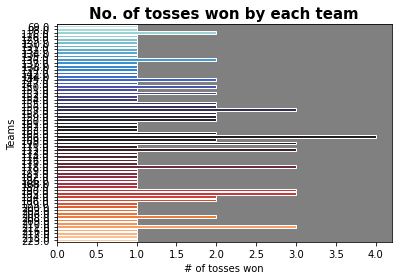

In [ ]:
toss=match_df['target'].value_counts()
ax = plt.axes()
ax.set(facecolor = "grey")
sns.set(rc={'figure.figsize':(15,10)},style='darkgrid')
ax.set_title('No. of tosses won by each team',fontsize=15,fontweight="bold")
sns.barplot(y=toss.index, x=toss, orient='h',palette="icefire",saturation=1)
plt.xlabel('# of tosses won')
plt.ylabel('Teams')
plt.show()

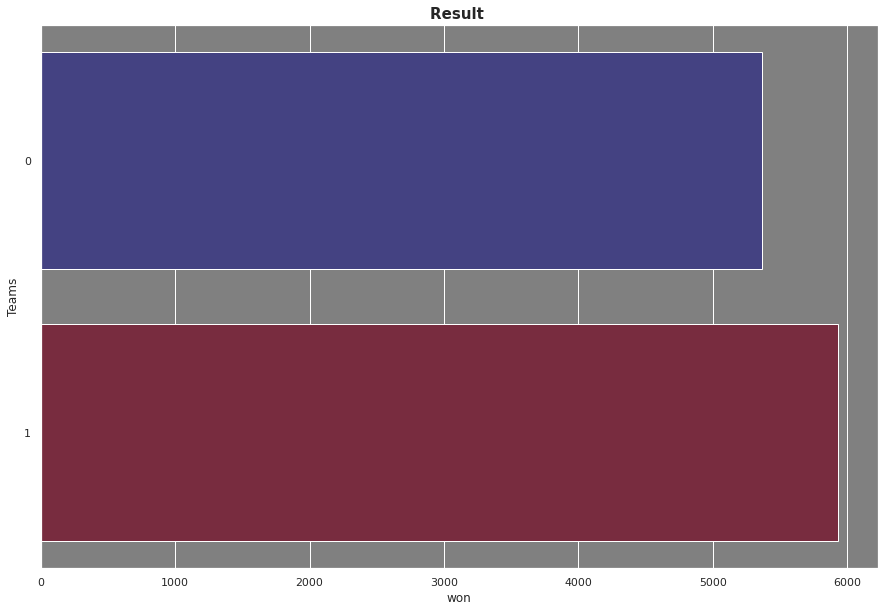

In [ ]:
toss=final_df['result'].value_counts()
ax = plt.axes()
ax.set(facecolor = "grey")
sns.set(rc={'figure.figsize':(15,10)},style='darkgrid')
ax.set_title('Result ',fontsize=15,fontweight="bold")
sns.barplot(y=toss.index, x=toss, orient='h',palette="icefire",saturation=1)
plt.xlabel('won')
plt.ylabel('Teams')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



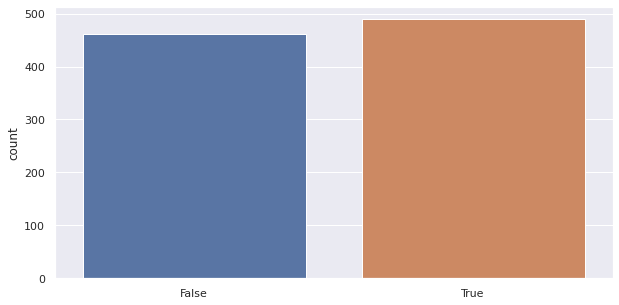

In [ ]:
toss =matches['TossWinner'] == matches['WinningTeam']
plt.figure(figsize=(10,5))
sns.countplot(toss)
plt.show()

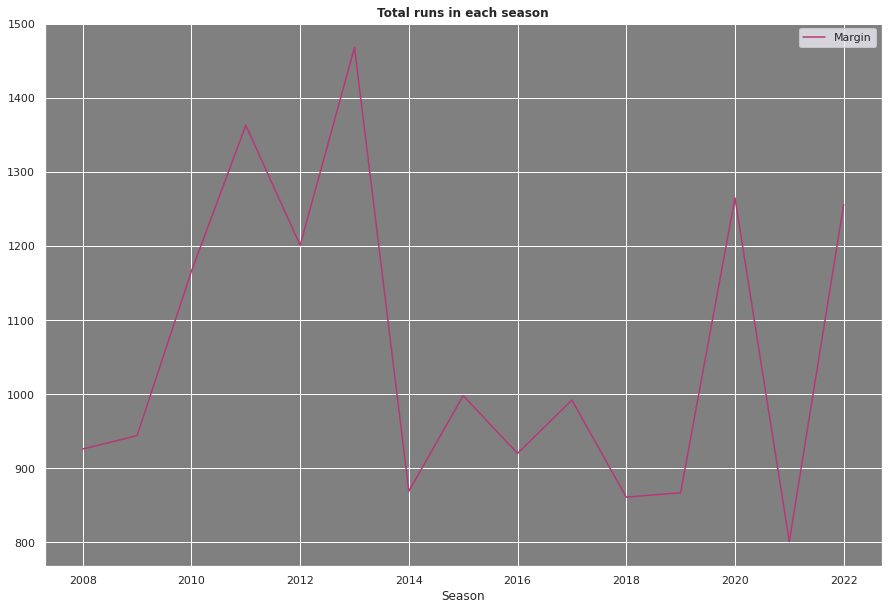

In [ ]:
season=matches.groupby(['Season'])['Margin'].sum().reset_index()
p=season.set_index('Season')
ax = plt.axes()
ax.set(facecolor = "grey")
sns.lineplot(data=p,palette="magma") 
plt.title('Total runs in each season',fontsize=12,fontweight="bold")
plt.show()

In [ ]:
import pickle
pickle.dump(pipe, open('pipe.pkl','wb'))


In [ ]:
X_train

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,current_run_rate,required_run_rate,target
12045,Sunrisers Hyderabad,Kolkata Knight Riders,Mumbai,41.0,31,7.0,9.101124,7.935484,176.0
19962,Kolkata Knight Riders,Sunrisers Hyderabad,Dubai,49.0,47,8.0,5.506849,6.255319,116.0
22572,Kolkata Knight Riders,Mumbai Indians,Abu Dhabi,122.0,106,10.0,14.571429,6.905660,156.0
7419,Mumbai Indians,Rajasthan Royals,Navi Mumbai,89.0,67,8.0,7.924528,7.970149,159.0
20145,Delhi Capitals,Mumbai Indians,Sharjah,116.0,108,9.0,7.000000,6.444444,130.0
...,...,...,...,...,...,...,...,...,...
23374,Mumbai Indians,Chennai Super Kings,Dubai,41.0,14,4.0,6.566038,17.571429,157.0
10800,Kolkata Knight Riders,Rajasthan Royals,Mumbai,70.0,41,7.0,11.240506,10.243902,218.0
11250,Sunrisers Hyderabad,Punjab Kings,Mumbai,117.0,85,9.0,6.000000,8.258824,152.0
1860,Royal Challengers Bangalore,Gujarat Titans,Mumbai,101.0,74,10.0,8.869565,8.189189,169.0


In [ ]:
y_train

12045    1
19962    1
22572    1
7419     1
20145    1
        ..
23374    0
10800    0
11250    1
1860     1
15121    0
Name: result, Length: 11187, dtype: int64